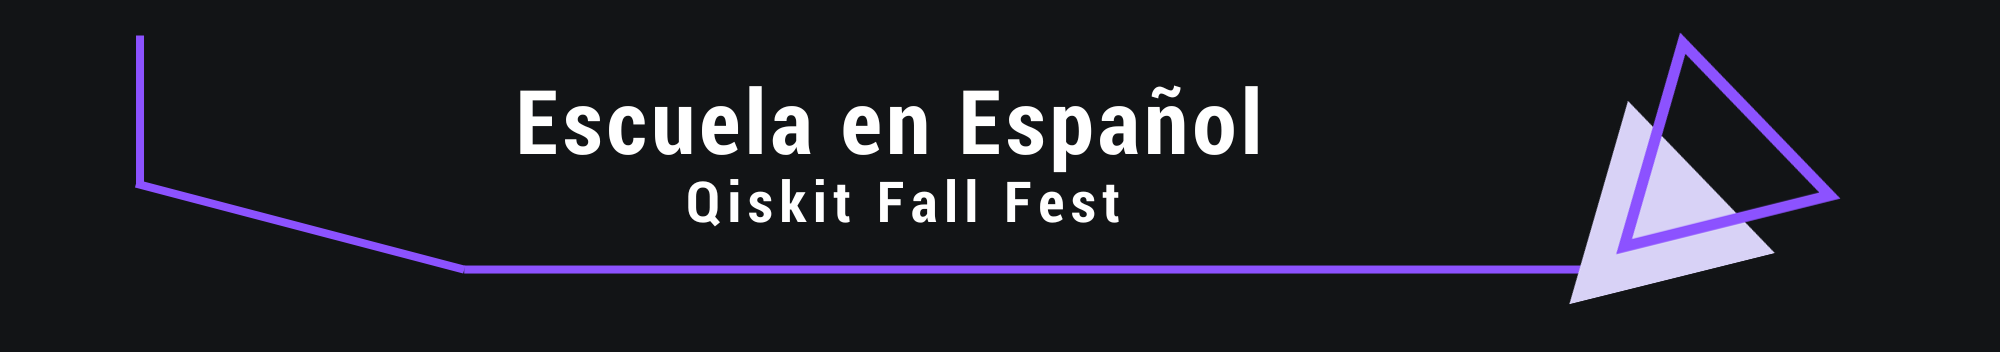

# <center> Reto 1: Circuitos Cuánticos

Comenzaremos aprendiendo cómo realizar sumas simples utilizando circuitos cuánticos.
Al igual que en la computación clásica, donde puedes combinar diferentes compuertas lógicas (por ejemplo, AND, OR, XOR, etc.) para crear sumadores binarios, también puedes crear sumadores con circuitos cuánticos.

In [1]:
# Importación de bibliotecas estándar de Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_bloch_multivector

### ¿Qué son los circuitos cuánticos?
Los circuitos cuánticos son modelos de computación cuántica en los que una computación es una secuencia de compuertas cuánticas. Echemos un vistazo a algunas de las compuertas cuánticas populares.

### Compuerta X 
Una compuerta X equivale a una rotación alrededor del eje X de la esfera de Bloch por $\pi$ radianes. Mapea $|0\rangle$ a $|1\rangle$ y $|1\rangle$ a $|0\rangle$. Es el equivalente cuántico de la compuerta NOT para computadoras clásicas y a veces se le llama inversión de bits. Si no estás familiarizado con el álgebra lineal, puedes aprenderlo aquí: https://qiskit.org/textbook/ch-appendix/linear_algebra.html.

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

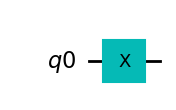

In [2]:
# Hagamos una compuerta X en un qubit con estado |0>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.draw(output='mpl')

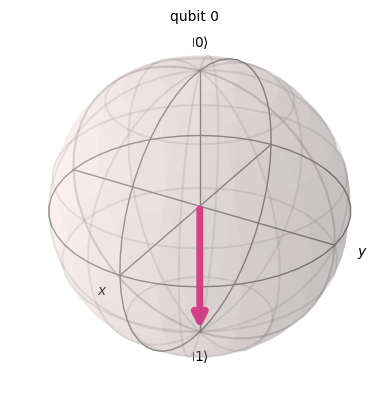

In [3]:
# Veamos el resultado
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### Compuerta H
Una compuerta Hadamard representa una rotación de $\pi$ alrededor del eje que se encuentra en el medio del eje X y el eje Z. Mapea el estado base $|0\rangle$ a $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, lo que significa que una medición tendrá probabilidades iguales de ser `1` o `0`, creando una 'superposición' de estados. Este estado también se representa como $|+ \rangle$.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

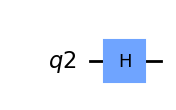

In [4]:
# Hagamos una compuerta H en un qubit con estado |0>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.draw(output='mpl')

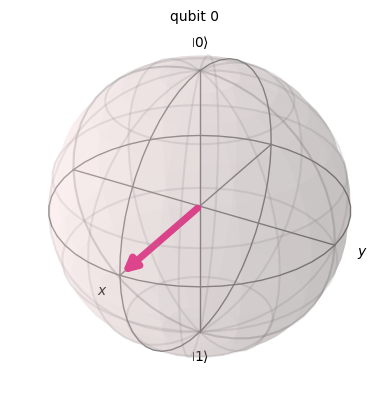

In [5]:
# Veamos el resultado
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### Compuerta Z 
The Z gate represents a rotation around the Z-axis of the Bloch sphere by $\pi$ radians. It is sometimes called a 'phase shift gate'.

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

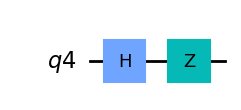

In [6]:
# Hagamos una compuerta Z en el estado |+>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.z(q[0])
qc.draw(output='mpl')

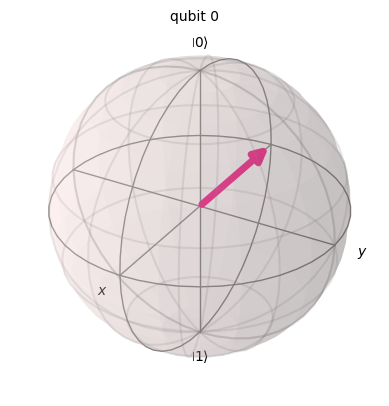

In [7]:
# Veamos el resultado
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### Compuerta CX (o compuerta CNOT)
La compuerta NOT controlada (también conocida como compuerta CNOT o CX) actúa sobre dos qubits. Realiza la operación NOT (equivalente a aplicar una compuerta X) solo en el segundo qubit cuando el primer qubit es $|1\rangle$, de lo contrario lo deja sin cambios. Nota: Qiskit enumera los bits en una cadena de derecha a izquierda.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

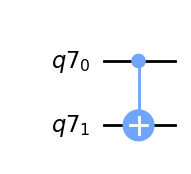

In [8]:
# Hagamos una compuerta CX sobre |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0], q[1])
qc.draw(output='mpl')

### Compuerta CZ 
La compuerta CZ actúa sobre dos qubits, llamados 'qubit de control' y 'qubit de destino' (o qubit objetivo). Cambia el signo (equivalente a aplicar la compuerta de cambio de fase Z) del qubit de destino si y solo si el qubit de control es $|1\rangle$.

$CZ = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}$

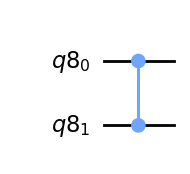

In [9]:
# Hagamos una compuerta CZ sobre |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cz(q[0], q[1])
qc.draw(output='mpl')

Nota: Una compuerta CZ  puede ser  construida a partir de una compuerta CX  y dos H.

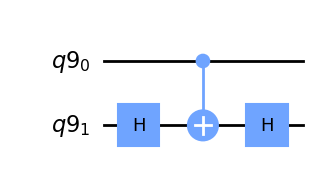

In [10]:
# Hagamos una compuerta CZ con una compuerta CX y dos compuertas H
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0], q[1])
qc.h(q[1])
qc.draw(output='mpl')

### Compuerta CCX
La compuerta CCX también se llama compuerta Toffoli.
La compuerta CCX es una compuerta de tres bits, con dos controles y un objetivo como sus entradas y salidas. Si los dos primeros bits están en el estado $|1\rangle$, aplica una Pauli-X (o NOT) en el tercer bit. De lo contrario, no hace nada. Nota: Qiskit enumera los bits en una cadena de derecha a izquierda.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{pmatrix}$

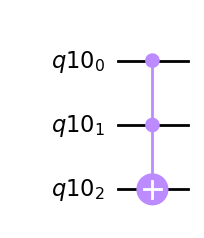

In [11]:
# Hagamos una compuerta CCX-gate sobre |000>
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

## Creando compuertas lógicas con compuertas cuánticas
Ahora comencemos a crear una compuerta lógica clásica utilizando compuertas cuánticas.
Se mostrarán cada compuerta y sus tablas de verdad. Aquí denominamos los registros cuánticos como `q` y los registros clásicos como `c`, donde codificamos la salida de la medición.

### Compuerta NOT
Como se mencionó anteriormente, una compuerta X puede considerarse como una compuerta NOT. La tabla de verdad de una compuerta NOT se ve de la siguiente manera:


|entrada|salida|
|--|--|
|0|1|
|1|0|

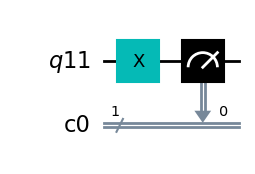

In [12]:
# Crea un circuito cuántico con 1 registro cuántico y 1 registro clásico
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q[0], c[0])    # Mapear la medición cuántica a los bits clásicos
qc.draw(output='mpl')

### Compuerta AND 
La tabla de verdad para la compuerta AND luce de la siguiente manera

|A (entrada)|B (entrada)|salida|
|--|--|--|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

Con una compuerta CCX, el resulado de una compuerta AND se usa dos qubits de control y la salida sera el qubit objetivo.

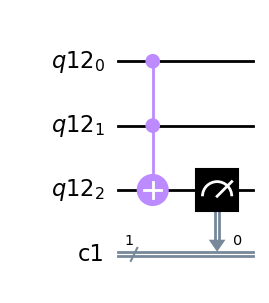

In [13]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### Compuerta NAND 
Una compuerta NAND se puede crear aplicando una compuerta NOT después de aplicar una compuerta AND.





|A (entrada)|B (entrada)|salida|
|--|--|--|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

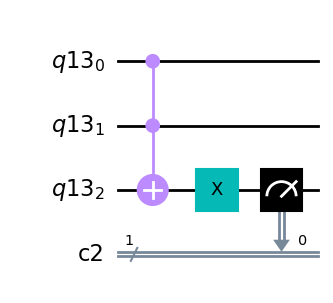

In [14]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

###  Compuerta OR

|A (entrada)|B (entrada)|salida|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

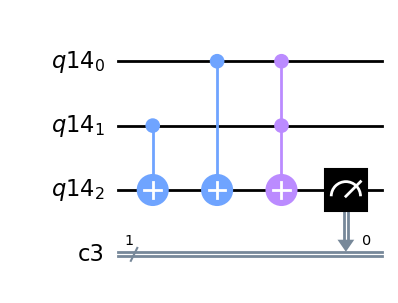

In [15]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### Compuerta XOR
|A (entrada)|B (entrada)|salida|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

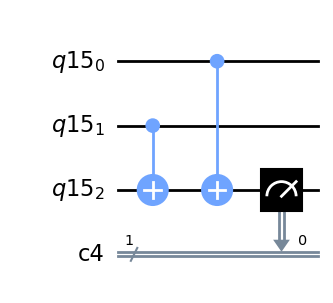

In [16]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### Compuerta NOR

|A (entrada)|B (entrada)|salida|
|--|--|--|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|0|

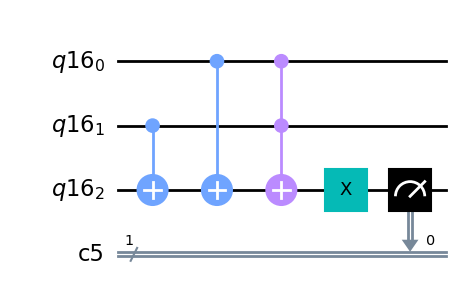

In [17]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

## Medio Sumador
El medio sumador se utiliza para sumar los dos dígitos menos significativos en una suma binaria.
Tiene dos entradas binarias individuales, llamadas A y B, y dos salidas C (acarreo) y S (suma).
La salida C se utilizará como entrada para el Sumador Completo, que se explicará más adelante, para obtener el valor en el dígito superior.

Los medio sumadores pueden describirse con la tabla de verdad que se muestra a continuación.

|A (entrada)|B (entrada)|S (suma)|C (acarreo de salida)|
|-----------|------------|------------|------------|
|0|0|0|0|
|0|1|1|0|
|1|0|1|0|
|1|1|0|1|

A partir de la tabla de verdad, deberías notar que la salida de acarreo, C, es el resultado de operar una compuerta AND entre A y B, mientras que la salida S es el resultado de operar una compuerta XOR entre A y B.
Dado que ya hemos creado las compuertas AND y XOR, podemos combinar estas compuertas y crear un medio sumador de la siguiente manera:

{'10': 1000}


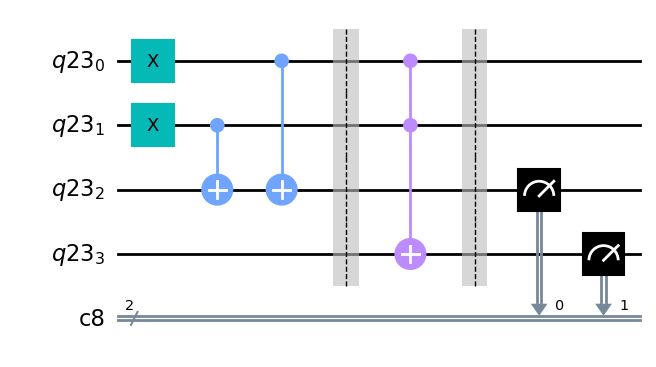

In [20]:
# Definir registros y un circuito cuántico
q = QuantumRegister(4)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

# XOR
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.barrier()

# AND
qc.ccx(q[0], q[1], q[3])
qc.barrier()

# Suma
qc.measure(q[2], c[0])
#Carry out
qc.measure(q[3], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count = result.get_counts()
print(count)
qc.draw(output='mpl')

# Ejercicio

El sumador completo toma dos números binarios, más un bit de desbordamiento como entrada, al cual llamaremos X.
Crea un sumador completo mediante un circuito cuántico y ejecuta las salidas con datos de entrada.

$A=1$, $B=0$, $X=1$
 


La tabla de verdad del sumador completo

|A(entrada)|B(entrada)|X(acarreo de entrada)|S(suma)|C(acarreo de salida)|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|1|0|
|0|1|0|1|0|
|0|1|1|0|1|
|1|0|0|1|0|
|1|0|1|0|1|
|1|1|0|0|1|
|1|1|1|1|1|


En la siguiente celda escribe tu código para diseñar el sumador completo.

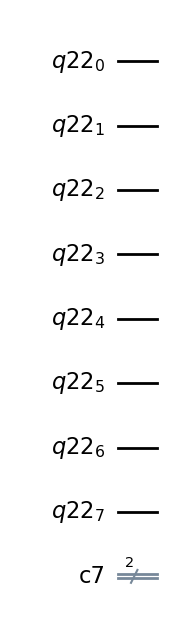

In [19]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute


# Define los registros
q = QuantumRegister(8) # 8 qubits
c = ClassicalRegister(2) # 2 bits clásicos
qc = QuantumCircuit(q, c)



# Define la entrada

# Define el circuito cuántico

# Mide tu circuito, recuerda, se deben medir 2 qubits de salida



simulador = Aer.get_backend('aer_simulator')
job = simulador.run(qc, shots=1000)
result = job.result()
count = result.get_counts()
print(count)
qc.draw(output='mpl')

## En el siguiente enlace encontrarás el formulario para subir la respuesta de tu trabajo, recuerda que solo debes contestar una vez: https://forms.gle/Roommvn4x51hocXd7